In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("data_new.csv")

In [3]:
import pdecharts
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Source Han Mono SC']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 9 columns):
年份      1542 non-null int64
姓名      1542 non-null object
院系码     1542 non-null int64
专业码     1542 non-null int64
方向码     1542 non-null object
初试总分    1542 non-null int64
复试成绩    1542 non-null float64
总成绩     1542 non-null float64
免试生     1542 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 108.5+ KB


In [5]:
data.head()

年份   姓名  院系码    专业码 方向码  初试总分   复试成绩    总成绩  免试生
0  2020  蔡潮鑫  670  81200  69     0  84.43  84.43    1
1  2020  蔡忠腾  670  81200  69     0  90.03  90.03    1
2  2020  陈泓仰  670  81200  69     0  90.27  90.27    1
3  2020  陈笑儒  670  81200  69     0  89.71  89.71    1
4  2020  董钧昊  670  81200  69     0  85.51  85.51    1

各属性相关度

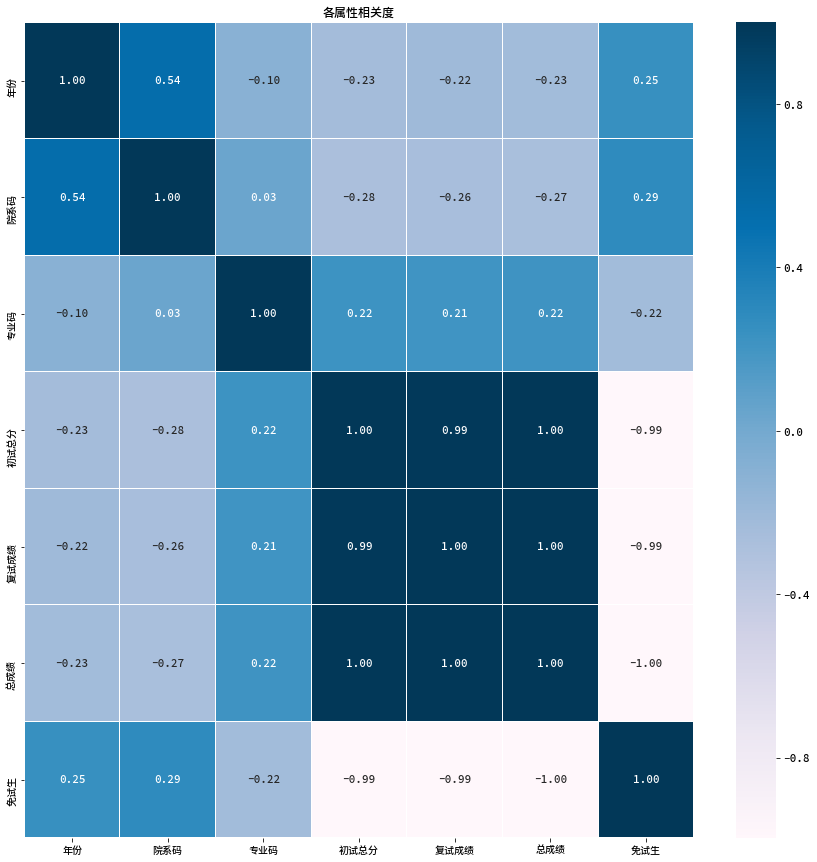

In [6]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap='PuBu')
plt.title('各属性相关度')
plt.savefig("各属性相关度.png")

In [80]:
import DecisionTree 
data=pd.read_csv("data_new.csv")
data["专业方向"]=data.apply(lambda x:str(x.专业码)+str(x.方向码),axis=1)
data[data.免试生==1]=DecisionTree.processNumber(data[data.免试生==1],"总成绩","专业方向")
data[data.免试生==0]=DecisionTree.processNumber(data[data.免试生==0],"总成绩","专业方向")
data

年份   姓名  院系码    专业码 方向码  初试总分    复试成绩             总成绩  免试生     专业方向
0     2020  蔡潮鑫  670  81200  69     0   84.43    (79.67, inf]    1  8120069
1     2020  蔡忠腾  670  81200  69     0   90.03    (79.67, inf]    1  8120069
2     2020  陈泓仰  670  81200  69     0   90.27    (79.67, inf]    1  8120069
3     2020  陈笑儒  670  81200  69     0   89.71    (79.67, inf]    1  8120069
4     2020  董钧昊  670  81200  69     0   85.51    (79.67, inf]    1  8120069
...    ...  ...  ...    ...  ..   ...     ...             ...  ...      ...
1537  2015  马杰超  620  85212  69   345  375.82  (629.665, inf]    0  8521269
1538  2015   王玥  620  85212  69   357  357.81  (629.665, inf]    0  8521269
1539  2015   廖瑜  620  85212  69   348  366.81  (629.665, inf]    0  8521269
1540  2015  黎贵海  620  85212  69   347  366.05  (629.665, inf]    0  8521269
1541  2015  黄俊栩  620  85212  69   328  382.47  (629.665, inf]    0  8521269

[1542 rows x 10 columns]

In [ ]:
import pandas as pd
import DecisionTree 
from mlxtend.preprocessing import TransactionEncoder
data=pd.read_csv("data_new.csv")
data=data[data.免试生==1]
data["专业方向"]=data.apply(lambda x:str(x.专业码)+str(x.方向码),axis=1)
data=DecisionTree.processNumber(data,"总成绩","专业方向")
data=data[["总成绩","专业方向"]].astype("str")
print(data.info())
te = TransactionEncoder()
te_ary = te.fit(data.values.tolist()).transform(data.values.tolist())
df = pd.DataFrame(te_ary, columns=te.columns_)
df

apriori

In [13]:
import pandas as pd
import DecisionTree 
from mlxtend.preprocessing import TransactionEncoder
data=pd.read_csv("data_new.csv")
data["专业方向"]=data.apply(lambda x:str(x.专业码)+str(x.方向码),axis=1)
data[data.免试生==1]=DecisionTree.processNumber(data[data.免试生==1],"总成绩","专业方向")
data[data.免试生==0]=DecisionTree.processNumber(data[data.免试生==0],"总成绩","专业方向")
data=data[["总成绩","专业方向"]].astype("str")
print(data.info())
te = TransactionEncoder()
te_ary = te.fit(data.values.tolist()).transform(data.values.tolist())
df = pd.DataFrame(te_ary, columns=te.columns_)
df

D:\Code\Python\数据挖掘\final\DecisionTree.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(col, inplace=True, ascending=True)
D:\Code\Python\数据挖掘\final\DecisionTree.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.cut(data[col], bins=[0, max_i, np.inf])
D:\Code\Python\数据挖掘\final\DecisionTree.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/u

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 2 columns):
总成绩     1542 non-null object
专业方向    1542 non-null object
dtypes: object(2)
memory usage: 24.2+ KB
None


(0.0, 629.665]  (0.0, 79.67]  (629.665, inf]  (79.67, inf]  8120069  \
0              False         False           False          True     True   
1              False         False           False          True     True   
2              False         False           False          True     True   
3              False         False           False          True     True   
4              False         False           False          True     True   
...              ...           ...             ...           ...      ...   
1537           False         False            True         False    False   
1538           False         False            True         False    False   
1539           False         False            True         False    False   
1540           False         False            True         False    False   
1541           False         False            True         False    False   

      81200J2  8350069  852111  852112  8521169  852121  852122  8521269  
0       False    False   False   False    False   False   False    False  
1       False    False   False   False    False   False   False    False  
2       False    False   False   False    False   False   False    False  
3       False    False   False   False    False   False   False    False  
4       False    False   False   False    False   False   False    False  
...       ...      ...     ...     ...      ...     ...     ...      ...  
1537    False    False   False   False    False   False   False     True  
1538    False    False   False   False    False   False   False     True  
1539    False    False   False   False    False   False   False     True  
1540    False    False   False   False    False   False   False     True  
1541    False    False   False   False    False   False   False     True  

[1542 rows x 13 columns]

In [14]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= 2]
frequent_itemsets

support                   itemsets
0   0.040208             ((0.0, 79.67])
1   0.536316           ((629.665, inf])
2   0.422827             ((79.67, inf])
3   0.199092                  (8120069)
4   0.035668                  (8350069)
5   0.256809                   (852111)
6   0.046693                   (852112)
7   0.285992                   (852121)
8   0.146563                  (8521269)
9   0.027237     (852121, (0.0, 79.67])
10  0.060311  (8120069, (629.665, inf])
11  0.102464   ((629.665, inf], 852111)
12  0.046693   (852112, (629.665, inf])
13  0.180285   (852121, (629.665, inf])
14  0.103761  (8521269, (629.665, inf])
15  0.138781    (8120069, (79.67, inf])
16  0.022049    (8350069, (79.67, inf])
17  0.153048     ((79.67, inf], 852111)
18  0.078470     (852121, (79.67, inf])
19  0.030480    (8521269, (79.67, inf])

In [18]:
from mlxtend.frequent_patterns import association_rules
result = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
result["type_consequents"] = result.consequents.apply(lambda x:[i[0] for i in x][0])
result[result["type_consequents"]=='('].sort_values("support",ascending=False)

antecedents       consequents  antecedent support  consequent support  \
6     (852121)  ((629.665, inf])            0.285992            0.536316   
14    (852111)    ((79.67, inf])            0.256809            0.422827   
10   (8120069)    ((79.67, inf])            0.199092            0.422827   
8    (8521269)  ((629.665, inf])            0.146563            0.536316   
4     (852111)  ((629.665, inf])            0.256809            0.536316   
15    (852121)    ((79.67, inf])            0.285992            0.422827   
1    (8120069)  ((629.665, inf])            0.199092            0.536316   
5     (852112)  ((629.665, inf])            0.046693            0.536316   
17   (8521269)    ((79.67, inf])            0.146563            0.422827   
12   (8350069)    ((79.67, inf])            0.035668            0.422827   

     support  confidence      lift  leverage  conviction type_consequents  
6   0.180285    0.630385  1.175398  0.026903    1.254506                (  
14  0.153048    0.595960  1.409463  0.044462    1.428502                (  
10  0.138781    0.697068  1.648588  0.054599    1.905290                (  
8   0.103761    0.707965  1.320050  0.025157    1.587765                (  
4   0.102464    0.398990  0.743945 -0.035267    0.771507                (  
15  0.078470    0.274376  0.648909 -0.042456    0.795416                (  
1   0.060311    0.302932  0.564837 -0.046465    0.665191                (  
5   0.046693    1.000000  1.864571  0.021651         inf                (  
17  0.030480    0.207965  0.491843 -0.031491    0.728721                (  
12  0.022049    0.618182  1.462019  0.006968    1.511642                (

In [16]:
result["item"]=result.apply(lambda x: [ str(i)+"->"+str(j) for i,j in zip(x.antecedents,x.consequents) ][0],axis=1)
result = result[result["type_consequents"]=='('][["support","confidence","item"]].round(3)
result

support  confidence                     item
1     0.060       0.303  8120069->(629.665, inf]
4     0.102       0.399   852111->(629.665, inf]
5     0.047       1.000   852112->(629.665, inf]
6     0.180       0.630   852121->(629.665, inf]
8     0.104       0.708  8521269->(629.665, inf]
10    0.139       0.697    8120069->(79.67, inf]
12    0.022       0.618    8350069->(79.67, inf]
14    0.153       0.596     852111->(79.67, inf]
15    0.078       0.274     852121->(79.67, inf]
17    0.030       0.208    8521269->(79.67, inf]

In [17]:
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
lineFig = Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
lineFig.set_global_opts(title_opts=opts.TitleOpts(title="总成绩与专业方向中的关联规则"),
                            yaxis_opts=opts.AxisOpts(name="值"),
                            xaxis_opts=opts.AxisOpts(name="关联规则"))
lineFig.add_xaxis(result.item.values.tolist())
for i in result.columns.tolist():
    if i != 'item':
        lineFig.add_yaxis(str(i), result[i].values.tolist())
make_snapshot(snapshot, lineFig.render(), "关联规则_all_1.png")

In [71]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# data["专业方向"]=data.apply(lambda x:str(x.专业码)+str(x.方向码),axis=1)
x=data[["初试总分","总成绩"]]
y=data[["专业码"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree.fit(x_train,y_train)
print(classification_report(tree.predict(x_test),y_test))
export_graphviz(tree,"1.dot",feature_names=x.columns.tolist(),class_names=tree.classes_.astype('str'))

              precision    recall  f1-score   support

       81200       0.29      0.49      0.36        37
       83500       0.00      0.00      0.00         0
       85211       0.50      0.42      0.45       119
       85212       0.70      0.63      0.67       153

    accuracy                           0.53       309
   macro avg       0.37      0.39      0.37       309
weighted avg       0.57      0.53      0.55       309



D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


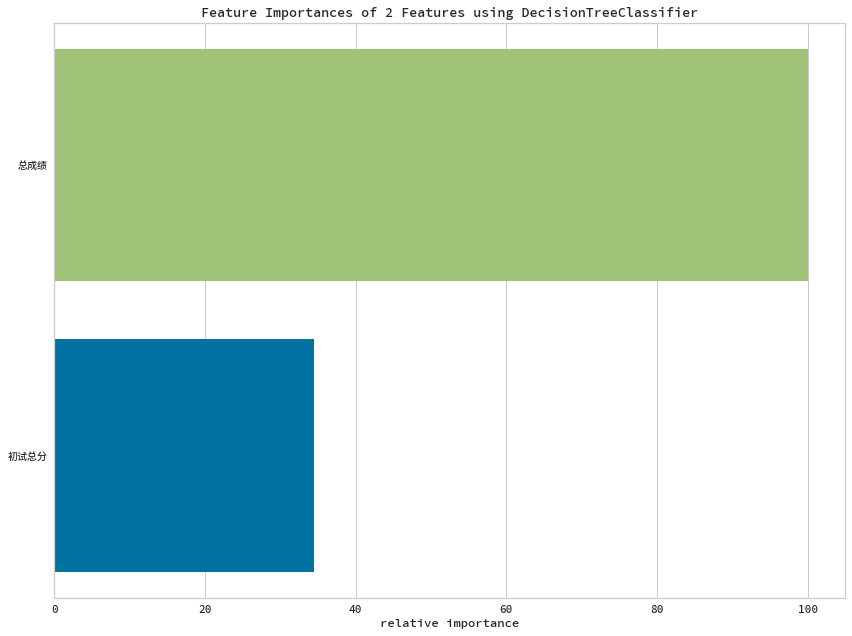

In [103]:
from yellowbrick.features import FeatureImportances
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot()

FeatureImportances(DecisionTreeClassifier(criterion='entropy',max_depth=3), ax=ax).fit(x_train,y_train).poof("特征重要性.png")

各专业

In [11]:
data["专业方向"]=data.apply(lambda x:str(x.专业码)+str(x.方向码),axis=1)

In [ ]:
data[(data.免试生)&(data.取消录取==0)][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).reset_index().groupby("年份")

In [ ]:
import plotly.express as px
px.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).reset_index().groupby("年份"),x="年份")

In [ ]:
data[(data.免试生)&(data.取消录取==0)][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).plot.line(figsize=(20,10))

In [34]:
data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).sort_index(level='年份').loc[(2016,)]

复试成绩                               
              mean median    min    max       std
专业方向                                             
8120069  84.841905  84.55  80.31  91.05  2.365323
8350069  85.010000  85.01  81.46  88.56  5.020458
852111   83.536286  83.69  76.32  89.91  2.666421
8521269  82.217538  81.98  73.25  93.25  4.299822

In [12]:
data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','median','min','max','std']).sort_index(level='专业方向').round(2)#.loc[('8120069',)]

复试成绩                           
               mean median    min    max   std
专业方向    年份                                    
8120069 2016  84.84  84.55  80.31  91.05  2.37
        2017  87.39  87.00  83.91  93.32  2.44
        2018  91.68  91.44  88.29  94.38  1.60
        2019  89.53  89.00  87.53  95.70  1.75
        2020  87.94  86.83  83.83  97.76  3.37
8350069 2016  85.01  85.01  81.46  88.56  5.02
        2017  84.64  84.29  81.79  89.20  2.61
        2018  89.29  89.29  88.39  90.42  0.73
        2019  87.14  86.34  85.27  93.12  2.48
        2020  83.66  82.82  82.03  87.44  1.83
852111  2016  83.54  83.69  76.32  89.91  2.67
        2017  84.76  84.82  80.17  91.89  2.47
        2018  89.46  89.07  87.73  93.76  1.45
        2019  85.51  85.56  79.77  92.80  3.04
852121  2017  83.26  82.86  75.33  90.35  3.79
        2018  84.60  85.71  75.00  89.06  3.48
        2019  78.60  78.75  67.40  89.07  5.14
8521269 2016  82.22  81.98  73.25  93.25  4.30

In [16]:
from pyecharts.charts import Page
_1=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69保研录取复试分数",subtitle="计算机科学与技术专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_2=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69保研录取复试分数",subtitle="软件工程专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")


page=Page(layout=Page.SimplePageLayout)
page.add(_1, _2)
page.render()

df=data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).round(2).unstack()
df[~pd.isnull(df["复试成绩"]['mean'][2020])]

复试成绩                                                                 \
          mean                                min                               
年份        2016   2017   2018   2019   2020   2016   2017   2018   2019   2020   
专业方向                                                                            
8120069  84.84  87.39  91.68  89.53  87.94  80.31  83.91  88.29  87.53  83.83   
8350069  85.01  84.64  89.29  87.14  83.66  81.46  81.79  88.39  85.27  82.03   

                                                                          
           max                               std                          
年份        2016   2017   2018   2019   2020  2016  2017  2018  2019  2020  
专业方向                                                                      
8120069  91.05  93.32  94.38  95.70  97.76  2.37  2.44  1.60  1.75  3.37  
8350069  88.56  89.20  90.42  93.12  87.44  5.02  2.61  0.73  2.48  1.83

In [52]:
from pyecharts import options as opts
from pyecharts.charts import Page
def grid():
    _1=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)],title="每年081200_69保研录取",yName="分数",xName="专业方向")
    _2=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)],title="每年083500_69保研录取",yName="分数",xName="专业方向")
    _3=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)],title="每年085211_01保研录取",yName="分数",xName="专业方向")
    _4=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)],title="每年085212_01保研录取",yName="分数",xName="专业方向")
    
    
    return Page(layout=Page.SimplePageLayout).add(_1,_2,_3,_4)

In [15]:
from pyecharts import options as opts
from pyecharts.charts import Page
def grid():
    _2016=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).sort_index(level='年份').loc[(2016,)],title="每年各专业方向保研录取平均分",yName="分数",xName="专业方向")
    _2017=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).sort_index(level='年份').loc[(2017,)],title="每年各专业方向保研录取平均分",yName="分数",xName="专业方向")
    _2018=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).sort_index(level='年份').loc[(2018,)],title="每年各专业方向保研录取平均分",yName="分数",xName="专业方向")
    _2019=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).sort_index(level='年份').loc[(2019,)],title="每年各专业方向保研录取平均分",yName="分数",xName="专业方向")
    _2020=pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["年份","专业方向"]).agg(['mean','median','min','max','std']).sort_index(level='年份').loc[(2020,)],title="每年各专业方向保研录取平均分",yName="分数",xName="专业方向")
    
    return Page(layout=Page.SimplePageLayout).add(_2016,_2017,_2018,_2019,_2020)

In [53]:
grid().render()

'D:\\Code\\Python\\数据挖掘\\final\\render.html'

In [13]:
make_snapshot(snapshot, pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69保研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "保研_专业1.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69保研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "保研_专业2.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)].round(2),title="每年085211_01保研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "保研_专业3.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)].round(2),title="每年085212_01保研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "保研_专业4.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8521269',)].round(2),title="每年085212_69保研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "保研_专业5.png")

保研保上的

In [16]:
make_snapshot(snapshot, pdecharts.line(data[data.免试生==1][["年份","复试成绩"]].groupby('年份').agg(['mean','min','max','std']).round(2),title="每年保研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "年份_保研_数据.png")

In [115]:
make_snapshot(snapshot, pdecharts.line(data[data.免试生==1][["专业方向","复试成绩"]].groupby(["专业方向"]).agg(['mean','min','max','std']).round(2)[0:2],title="各专业方向保研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="专业方向").render(), "专业方向_保研_数据.png")

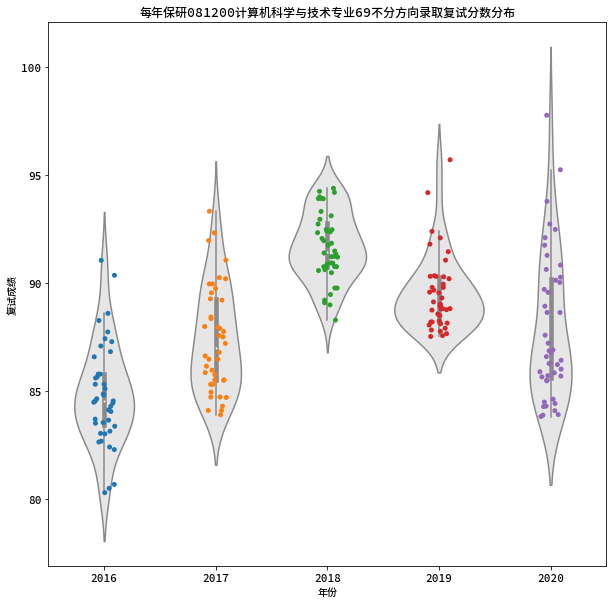

In [23]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==1)&(data.专业方向=='8120069')][["年份","复试成绩"]]
sns.violinplot(x=df["年份"],y=df["复试成绩"],ax=ax,color='.9')#,palette="BuPu_r"
sns.stripplot(x=df["年份"],y=df["复试成绩"],ax=ax,jitter=True)
plt.title('每年保研081200计算机科学与技术专业69不分方向录取复试分数分布')
plt.savefig("保研_分数_分布1.png")

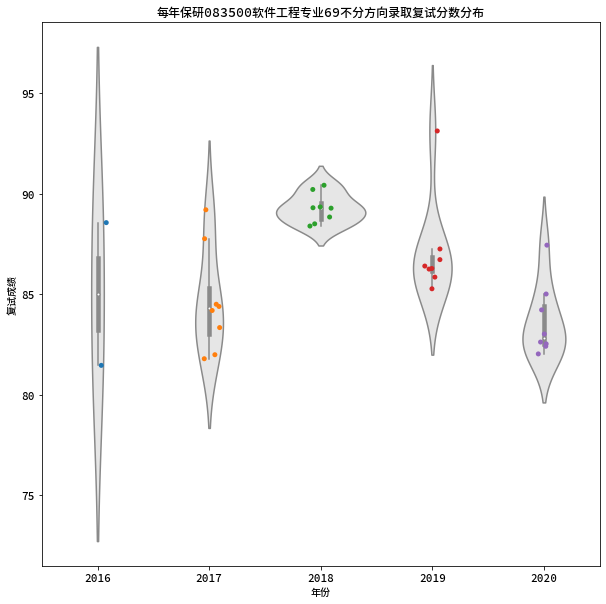

In [24]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==1)&(data.专业方向=='8350069')][["年份","复试成绩"]]
sns.violinplot(x=df["年份"],y=df["复试成绩"],ax=ax,color='.9')#,palette="BuPu_r"
sns.stripplot(x=df["年份"],y=df["复试成绩"],ax=ax,jitter=True)
plt.title('每年保研083500软件工程专业69不分方向录取复试分数分布')
plt.savefig("保研_分数_分布2.png")

In [ ]:
df.姓.to_list()

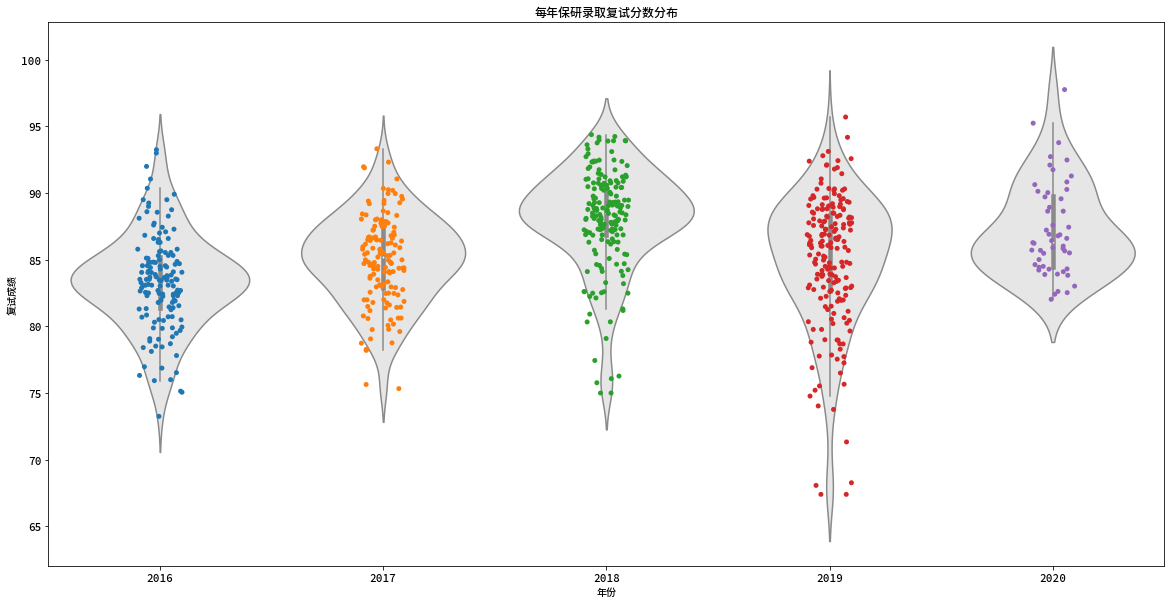

In [98]:
fig,ax = plt.subplots(figsize=(20,10))
df=data[data.免试生==1][["年份","复试成绩"]]
sns.violinplot(x=df["年份"],y=df["复试成绩"],ax=ax,color='.9')#,palette="BuPu_r"
sns.stripplot(x=df["年份"],y=df["复试成绩"],ax=ax,jitter=True)
plt.title('每年保研录取复试分数分布')
plt.savefig("保研_分数_分布.png")

考研考上的

In [17]:
data[(data.初试总分!=0)&(data.少数民族骨干计划==0)&(data.国防生==0)&(data.港澳台==0)&(data.退役大学生士兵计划==0)&(data.取消录取==0)] 
#.to_csv("考上的.csv",encoding='utf8',index=False)

In [104]:
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0].groupby('年份')[["初试总分","复试成绩","总成绩"]].mean().round(2),title="每年考研录取平均分",yName="分数",xName="年份").render(), "年份_考研_平均分.png")

In [9]:
data[data.免试生==0][["年份","初试总分","复试成绩"]].boxplot(by='年份',figsize=(20,10))
plt.savefig("考研_初试_复试.png")

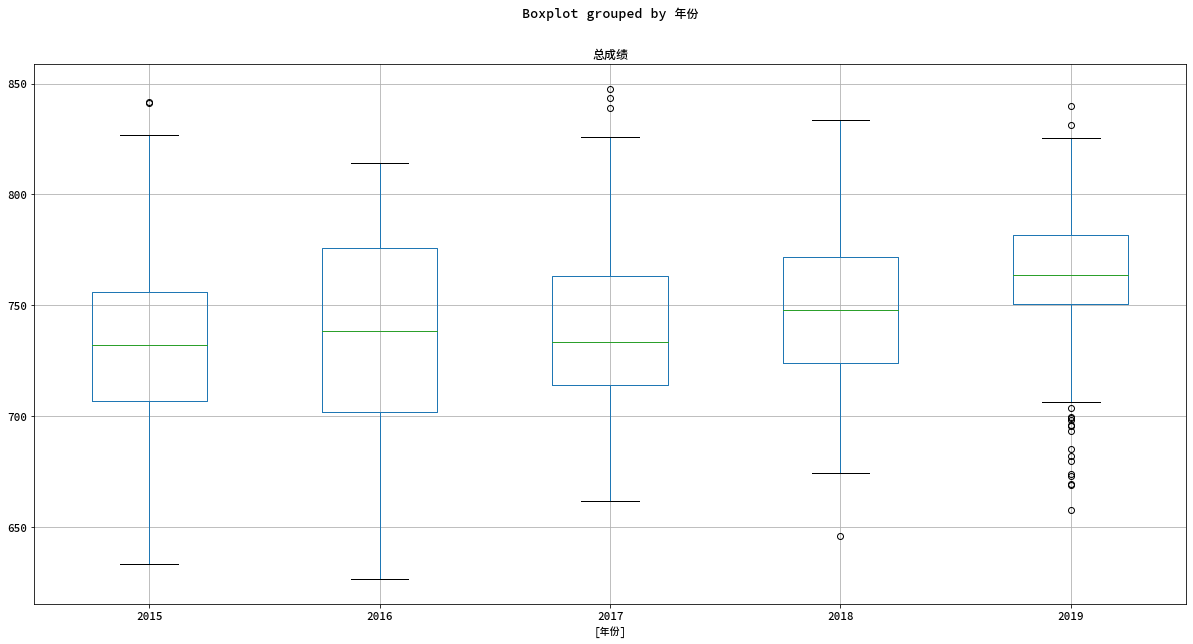

In [10]:
data[data.免试生==0][["年份","总成绩"]].boxplot(by='年份',figsize=(20,10))
plt.savefig("考研_总成绩.png")

In [17]:
data["专业方向"]=data.apply(lambda x:str(x.专业码)+str(x.方向码),axis=1)

In [23]:
data[data.免试生==0][["年份","专业方向","初试总分","复试成绩","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2)

初试总分                     复试成绩                            总成绩          \
        mean  min  max    std    mean     min     max    std    mean     min   
年份                                                                             
2015  371.25  334  426  24.88  402.42  363.33  424.59  17.07  773.67  740.02   
2016  324.93  306  351  14.53  373.59  348.82  399.14  16.91  698.52  669.23   
2017  368.60  348  405  15.17  398.96  384.94  422.70  12.81  767.56  739.83   
2018  354.24  328  388  16.77  414.50  374.64  452.84  18.21  768.74  732.64   
2019  372.56  345  412  17.48  398.89  377.52  423.09  13.46  771.45  734.60   

                     
         max    std  
年份                   
2015  841.59  29.34  
2016  746.94  25.60  
2017  800.92  18.86  
2018  823.84  23.59  
2019  820.82  23.86

In [106]:
data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向')#.loc[('8120069',)].round(2)

初试总分                     
                    mean  min  max        std
专业方向    年份                                   
8120069 2015  371.250000  334  426  24.879711
        2016  324.928571  306  351  14.530945
        2017  368.600000  348  405  15.169518
        2018  354.238095  328  388  16.765753
        2019  372.555556  345  412  17.475991
81200J2 2015  342.666667  315  381  22.804837
8350069 2015  343.000000  322  374  16.512621
        2016  350.000000  330  378  20.132892
        2017  355.000000  330  383  22.553640
        2018  334.250000  290  360  31.920474
        2019  341.500000  311  372  43.133514
852111  2015  338.517241  301  396  20.830302
        2016  340.058824  313  401  23.044714
        2017  351.541667  315  399  25.272393
        2018  349.937500  311  386  19.529857
        2019  372.392857  338  410  15.700236
852112  2015  340.846154  316  378  18.880529
        2016  313.384615  290  337  14.643192
        2017  337.142857  301  377  27.181051
        2018  334.000000  312  357  15.297059
        2019  341.533333  317  372  13.387419
8521169 2015  347.000000  310  413  35.394480
852121  2017  355.312500  304  418  22.267896
        2018  352.300000  303  419  24.129491
        2019  371.975610  335  413  16.062360
852122  2017  332.142857  313  362  19.709799
        2018  322.500000  307  354  14.354635
        2019  359.000000  351  367  11.313708
8521269 2015  361.936170  303  428  26.272684
        2016  367.343284  313  402  18.599896

In [108]:
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69考研录取初试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业1_初试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69考研录取初试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业2_初试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)].round(2),title="每年085211_01考研录取初试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业3_初试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852112',)].round(2),title="每年085211_02考研录取初试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业4_初试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)].round(2),title="每年085212_01考研录取初试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业5_初试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852122',)].round(2),title="每年085212_02考研录取初试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业6_初试.png")

In [109]:
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69考研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业1_复试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69考研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业2_复试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)].round(2),title="每年085211_01考研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业3_复试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852112',)].round(2),title="每年085211_02考研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业4_复试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)].round(2),title="每年085212_01考研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业5_复试.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852122',)].round(2),title="每年085212_02考研录取复试分数",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业6_复试.png")

In [116]:
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69考研录取总成绩",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业1_总成绩.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69考研录取总成绩",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业2_总成绩.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)].round(2),title="每年085211_01考研录取总成绩",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业3_总成绩.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852112',)].round(2),title="每年085211_02考研录取总成绩",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业4_总成绩.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)].round(2),title="每年085212_01考研录取总成绩",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业5_总成绩.png")
make_snapshot(snapshot, pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852122',)].round(2),title="每年085212_02考研录取总成绩",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="年份").render(), "考研_专业6_总成绩.png")

In [7]:
from pyecharts.charts import Page
_1=pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69考研录取复试分数",subtitle="计算机科学与技术专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_2=pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69考研录取复试分数",subtitle="软件工程专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_3=pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)].round(2),title="每年085211_01考研录取复试分数",subtitle="计算机技术专业计算机技术方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_4=pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852112',)].round(2),title="每年085211_02考研录取复试分数",subtitle="计算机技术专业计算机技术方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_5=pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)].round(2),title="每年085212_01考研录取复试分数",subtitle="软件工程专业软件工程方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_6=pdecharts.line(data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852122',)].round(2),title="每年085212_02考研录取复试分数",subtitle="软件工程专业软件工程方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")

page=Page(layout=Page.SimplePageLayout)
page.add(_1, _2, _3, _4, _5, _6)
page.render()

df=data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).round(2).unstack()
df[~pd.isnull(df["复试成绩"]['mean'][2019])]

'D:\\Code\\Python\\数据挖掘\\final\\render.html'

In [12]:
df=data[data.免试生==0][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).round(2).unstack()
df[~pd.isnull(df["复试成绩"]['mean'][2019])]

复试成绩                                                          \
           mean                                     min                   
年份         2015    2016    2017    2018    2019    2015    2016    2017   
专业方向                                                                      
8120069  402.42  373.59  398.96  414.50  398.89  363.33  348.82  384.94   
8350069  398.64  398.10  373.74  401.17  382.98  377.62  369.40  364.17   
852111   373.24  378.67  386.31  401.05  400.11  317.35  335.71  337.23   
852112   371.88  385.77  366.97  371.22  369.27  345.77  366.25  341.34   
852121      NaN     NaN  385.32  401.24  401.63     NaN     NaN  340.80   
852122      NaN     NaN  363.04  375.96  371.30     NaN     NaN  329.52   

                                                                               \
                            max                                    std          
年份         2018    2019    2015    2016    2017    2018    2019   2015   2016   
专业方向                                                                            
8120069  374.64  377.52  424.59  399.14  422.70  452.84  423.09  17.07  16.91   
8350069  393.40  362.13  426.54  420.40  382.38  415.59  403.84  18.63  21.72   
852111   351.41  368.32  406.70  413.76  444.69  441.72  426.58  22.95  18.19   
852112   326.60  329.76  402.62  407.50  391.83  396.40  432.84  14.80  12.12   
852121   348.42  370.31     NaN     NaN  435.76  437.90  446.47    NaN    NaN   
852122   337.76  370.24     NaN     NaN  406.59  398.40  372.35    NaN    NaN   

                              
                              
年份        2017   2018   2019  
专业方向                          
8120069  12.81  18.21  13.46  
8350069   7.45  10.34  29.49  
852111   25.08  20.34  12.86  
852112   18.74  23.06  22.78  
852121   19.79  18.49  16.41  
852122   27.76  18.61   1.49

In [14]:
from pyecharts.charts import Page
_1=pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69考研录取初试分数",subtitle="计算机科学与技术专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_2=pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69考研录取初试分数",subtitle="软件工程专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_3=pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)].round(2),title="每年085211_01考研录取初试分数",subtitle="计算机技术专业计算机技术方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_4=pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852112',)].round(2),title="每年085211_02考研录取初试分数",subtitle="计算机技术专业计算机技术方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_5=pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)].round(2),title="每年085212_01考研录取初试分数",subtitle="软件工程专业软件工程方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_6=pdecharts.line(data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852122',)].round(2),title="每年085212_02考研录取初试分数",subtitle="软件工程专业软件工程方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")

page=Page(layout=Page.SimplePageLayout)
page.add(_1, _2, _3, _4, _5, _6)
page.render()

df=data[data.免试生==0][["年份","专业方向","初试总分"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).round(2).unstack()
df[~pd.isnull(df["初试总分"]['mean'][2019])]

初试总分                                                              \
           mean                                    min                        
年份         2015    2016    2017    2018    2019   2015   2016   2017   2018   
专业方向                                                                          
8120069  371.25  324.93  368.60  354.24  372.56  334.0  306.0  348.0  328.0   
8350069  343.00  350.00  355.00  334.25  341.50  322.0  330.0  330.0  290.0   
852111   338.52  340.06  351.54  349.94  372.39  301.0  313.0  315.0  311.0   
852112   340.85  313.38  337.14  334.00  341.53  316.0  290.0  301.0  312.0   
852121      NaN     NaN  355.31  352.30  371.98    NaN    NaN  304.0  303.0   
852122      NaN     NaN  332.14  322.50  359.00    NaN    NaN  313.0  307.0   

                                                                               \
                  max                                std                        
年份        2019   2015   2016   2017   2018   2019   2015   2016   2017   2018   
专业方向                                                                            
8120069  345.0  426.0  351.0  405.0  388.0  412.0  24.88  14.53  15.17  16.77   
8350069  311.0  374.0  378.0  383.0  360.0  372.0  16.51  20.13  22.55  31.92   
852111   338.0  396.0  401.0  399.0  386.0  410.0  20.83  23.04  25.27  19.53   
852112   317.0  378.0  337.0  377.0  357.0  372.0  18.88  14.64  27.18  15.30   
852121   335.0    NaN    NaN  418.0  419.0  413.0    NaN    NaN  22.27  24.13   
852122   351.0    NaN    NaN  362.0  354.0  367.0    NaN    NaN  19.71  14.35   

                
                
年份        2019  
专业方向            
8120069  17.48  
8350069  43.13  
852111   15.70  
852112   13.39  
852121   16.06  
852122   11.31

In [15]:
from pyecharts.charts import Page
_1=pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2),title="每年081200_69考研录取总成绩",subtitle="计算机科学与技术专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_2=pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8350069',)].round(2),title="每年083500_69考研录取总成绩",subtitle="软件工程专业不分方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_3=pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852111',)].round(2),title="每年085211_01考研录取总成绩",subtitle="计算机技术专业计算机技术方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_4=pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852112',)].round(2),title="每年085211_02考研录取总成绩",subtitle="计算机技术专业计算机技术方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_5=pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852121',)].round(2),title="每年085212_01考研录取总成绩",subtitle="软件工程专业软件工程方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")
_6=pdecharts.line(data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('852122',)].round(2),title="每年085212_02考研录取总成绩",subtitle="软件工程专业软件工程方向",useCols=["平均值",'最低分','最高分','方差'],xName="年份")

page=Page(layout=Page.SimplePageLayout)
page.add(_1, _2, _3, _4, _5, _6)
page.render()

df=data[data.免试生==0][["年份","专业方向","总成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).round(2).unstack()
df[~pd.isnull(df["总成绩"]['mean'][2019])]

总成绩                                                          \
           mean                                     min                   
年份         2015    2016    2017    2018    2019    2015    2016    2017   
专业方向                                                                      
8120069  773.67  698.52  767.56  768.74  771.45  740.02  669.23  739.83   
8350069  741.64  748.10  728.74  735.42  724.48  722.62  715.40  694.17   
852111   711.76  718.73  737.85  750.99  772.50  633.13  680.67  683.54   
852112   712.73  699.15  704.11  705.22  710.81  672.44  672.50  669.75   
852121      NaN     NaN  740.63  753.54  773.61     NaN     NaN  694.72   
852122      NaN     NaN  695.18  698.46  730.30     NaN     NaN  661.72   

                                                                               \
                            max                                    std          
年份         2018    2019    2015    2016    2017    2018    2019   2015   2016   
专业方向                                                                            
8120069  732.64  734.60  841.59  746.94  800.92  823.84  820.82  29.34  25.60   
8350069  683.40  673.13  793.51  798.40  757.22  761.72  775.84  24.46  35.41   
852111   714.00  745.59  763.17  796.09  825.69  824.99  820.46  32.87  31.07   
852112   674.32  657.76  780.62  733.50  731.00  753.40  796.84  24.85  18.61   
852121   713.73  745.35     NaN     NaN  847.76  833.42  839.70    NaN    NaN   
852122   645.76  721.24     NaN     NaN  768.59  732.35  739.35    NaN    NaN   

                              
                              
年份        2017   2018   2019  
专业方向                          
8120069  18.86  23.59  23.86  
8350069  26.13  35.26  72.63  
852111   39.75  27.13  19.87  
852112   22.03  25.20  30.27  
852121   32.99  31.43  20.99  
852122   36.23  24.04  12.81

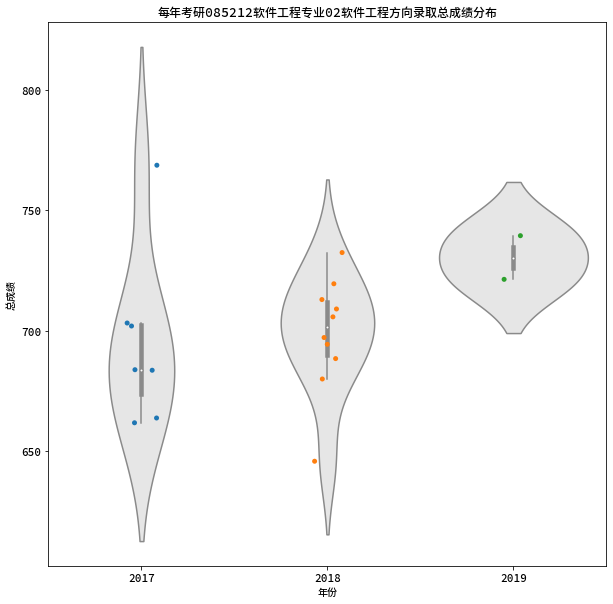

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==0)&(data.专业方向=='852122')][["年份","总成绩"]]
sns.violinplot(x=df["年份"],y=df["总成绩"],ax=ax,color='.9')
sns.stripplot(x=df["年份"],y=df["总成绩"],ax=ax,jitter=True)
plt.title('每年考研085212软件工程专业02软件工程方向录取总成绩分布')
plt.savefig("考研_分数_分布6.png")

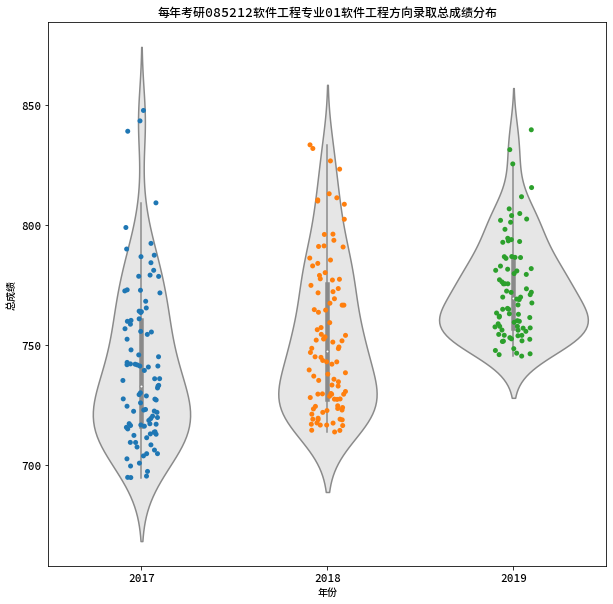

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==0)&(data.专业方向=='852121')][["年份","总成绩"]]
sns.violinplot(x=df["年份"],y=df["总成绩"],ax=ax,color='.9')
sns.stripplot(x=df["年份"],y=df["总成绩"],ax=ax,jitter=True)
plt.title('每年考研085212软件工程专业01软件工程方向录取总成绩分布')
plt.savefig("考研_分数_分布5.png")

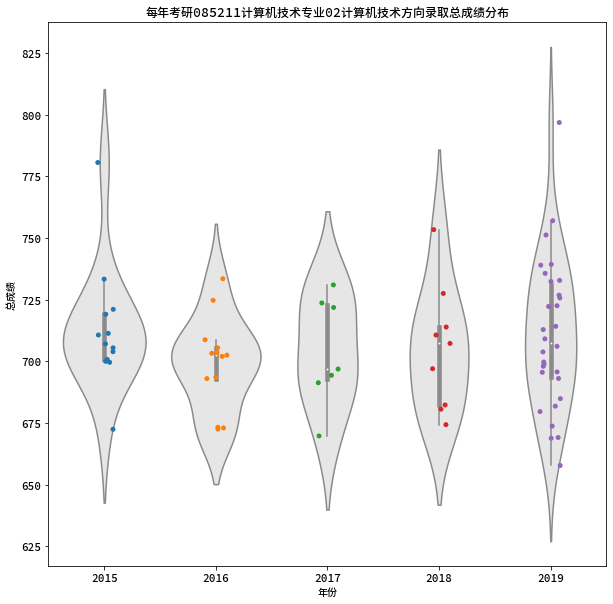

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==0)&(data.专业方向=='852112')][["年份","总成绩"]]
sns.violinplot(x=df["年份"],y=df["总成绩"],ax=ax,color='.9')
sns.stripplot(x=df["年份"],y=df["总成绩"],ax=ax,jitter=True)
plt.title('每年考研085211计算机技术专业02计算机技术方向录取总成绩分布')
plt.savefig("考研_分数_分布4.png")

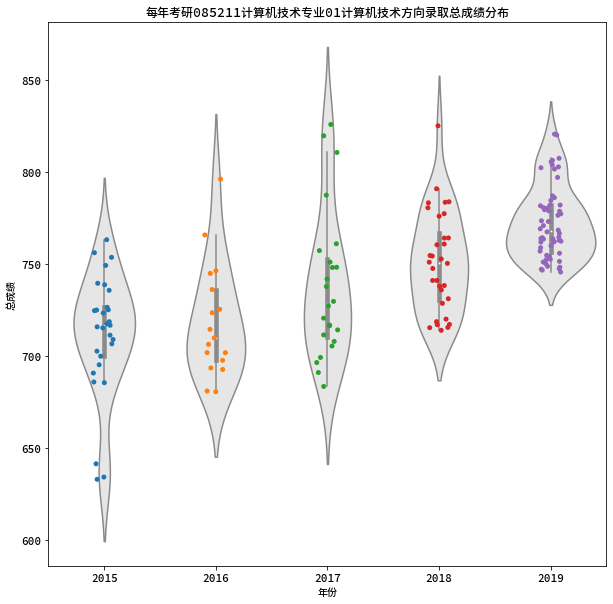

In [14]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==0)&(data.专业方向=='852111')][["年份","总成绩"]]
sns.violinplot(x=df["年份"],y=df["总成绩"],ax=ax,color='.9')
sns.stripplot(x=df["年份"],y=df["总成绩"],ax=ax,jitter=True)
plt.title('每年考研085211计算机技术专业01计算机技术方向录取总成绩分布')
plt.savefig("考研_分数_分布3.png")

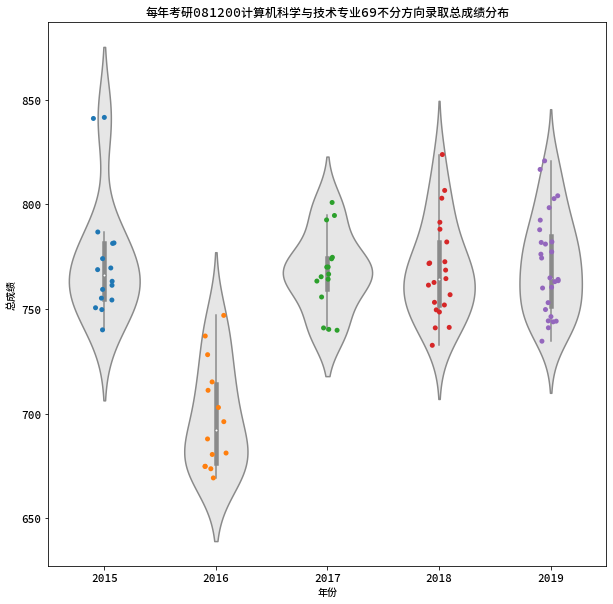

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==0)&(data.专业方向=='8120069')][["年份","总成绩"]]
sns.violinplot(x=df["年份"],y=df["总成绩"],ax=ax,color='.9')
sns.stripplot(x=df["年份"],y=df["总成绩"],ax=ax,jitter=True)
plt.title('每年考研081200计算机科学与技术专业69不分方向录取总成绩分布')
plt.savefig("考研_分数_分布1.png")

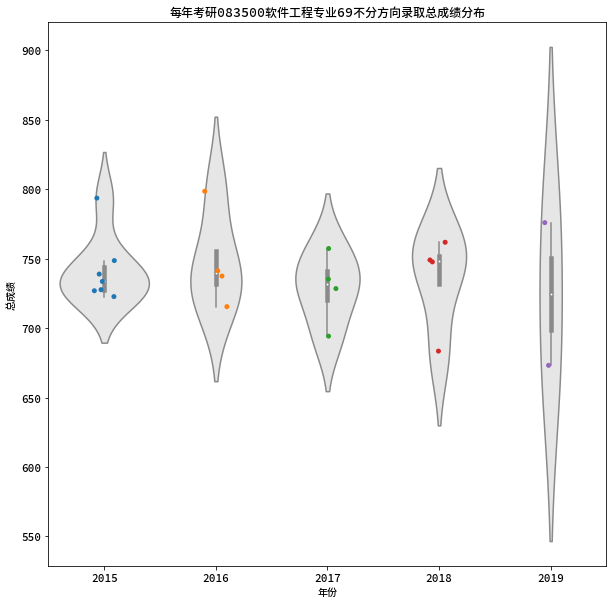

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==0)&(data.专业方向=='8350069')][["年份","总成绩"]]
sns.violinplot(x=df["年份"],y=df["总成绩"],ax=ax,color='.9')
sns.stripplot(x=df["年份"],y=df["总成绩"],ax=ax,jitter=True)
plt.title('每年考研083500软件工程专业69不分方向录取总成绩分布')
plt.savefig("考研_分数_分布2.png")

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.免试生==0)&(data.专业方向=='8350069')][["年份","总成绩"]]
sns.violinplot(x=df["年份"],y=df["总成绩"],ax=ax,color='.9')
sns.stripplot(x=df["年份"],y=df["总成绩"],ax=ax,jitter=True)
plt.title('每年考研083500软件工程专业69不分方向录取总成绩分布')
plt.savefig("考研_分数_分布2.png")

In [120]:
make_snapshot(snapshot, pdecharts.line(data[(data.免试生==0)&((data.专业方向=='8120069')|(data.专业方向=='8350069')|(data.专业方向=='852111')|(data.专业方向=='852112')|(data.专业方向=='852121')|(data.专业方向=='852122'))][["专业方向","总成绩"]].groupby(["专业方向"]).agg(['mean','min','max','std']).round(2),title="各专业方向考研录取总成绩",useCols=["平均值",'最低分','最高分','方差'],yName="分数",xName="专业方向").render(), "专业方向_考研_数据.png")

Text(0.5, 1.0, '-')

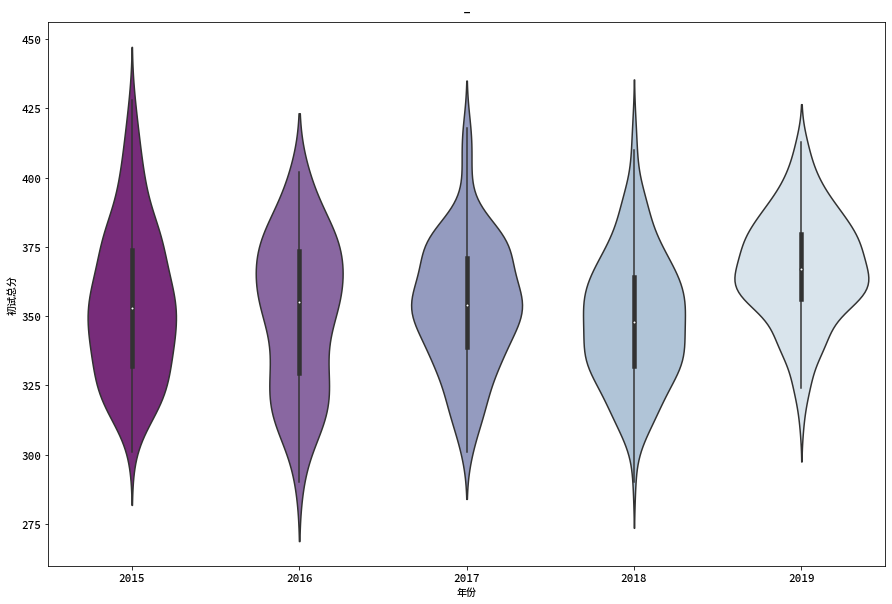

In [21]:
fig,ax = plt.subplots(figsize=(10,10))
df=data[(data.初试总分!=0)&(data.少数民族骨干计划==0)&(data.国防生==0)&(data.港澳台==0)&(data.退役大学生士兵计划==0)&(data.取消录取==0)][["年份","初试总分","复试成绩","总成绩"]]
sns.violinplot(x=df["年份"],y=df["初试总分"],ax=ax,palette="BuPu_r")
plt.title('-')

专业码+专业名

In [4]:
make_snapshot(snapshot, pdecharts.bar(data[data.取消录取==0].groupby('年份')['专业码'].value_counts().unstack(),
                            title="每年各专业录取人数",yName="人数",xName="年份",
                            useCols=["81200计算机科学与技术","83500软件工程","85211计算机技术","85212软件工程"]).render(), "年份_专业码.png")

In [9]:
make_snapshot(snapshot, pdecharts.bar(data[data.免试生==1].groupby('年份')['专业码'].value_counts().unstack(),
                            title="每年各专业保研录取人数",yName="人数",xName="年份",pos_left="30%",
                            useCols=["081200计算机科学与技术","083500软件工程","085211计算机技术","085212软件工程"]).render(), "年份_专业码_保研.png")

In [8]:
make_snapshot(snapshot, pdecharts.bar(data[data.免试生==0].groupby('年份')['专业码'].value_counts().unstack(),
                            title="每年各专业考研录取人数",yName="人数",xName="年份",pos_left="30%",
                            useCols=["081200计算机科学与技术","083500软件工程","085211计算机技术","085212软件工程"]).render(), "年份_专业码_考研.png")

成功录取人数

In [12]:
make_snapshot(snapshot, pdecharts.bar(data[data.取消录取==0].年份.value_counts().sort_index(),
                            title="每年成功录取人数",yName="人数",xName="年份",).render(), "年份_成功录取.png")

姓名长度

In [5]:
data["姓名长度"]=data.姓名.apply(lambda x:len(str(x)))
# data.姓名长度.value_counts()

In [6]:
make_snapshot(snapshot, pdecharts.bar(data[data.取消录取==0].groupby('年份')['姓名长度'].value_counts().unstack(),
                            title="每年各姓名长度录取人数",yName="人数",xName="年份",).render(), "年份_姓名长度.png")

姓

In [7]:
def run(x):
    if(len(str(x))==4):
        if(str(x)=="刘付远威"):return "刘"
        else:return "欧阳"
    else:
        return str(x)[0]
data["姓"]=data.姓名.apply(run)
# data.姓.value_counts()

In [ ]:
data.groupby('年份')['姓'].value_counts().rename('count').reset_index().groupby('年份').head().set_index('年份')

In [72]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType

df = data.groupby('年份')['姓'].value_counts().rename('count').reset_index().groupby('年份').head()
xing=df.姓.to_list()
cnt=df['count'].to_list()
values=[None,None,None,None,None,None]

barFig = Bar(init_opts=opts.InitOpts())
barFig.set_global_opts(title_opts=opts.TitleOpts(title="每年录取人数排名前五的姓"),
                           yaxis_opts=opts.AxisOpts(name="人数"),
                           xaxis_opts=opts.AxisOpts(name="年份"),
                      legend_opts=opts.LegendOpts(pos_left="70%"))
barFig.add_xaxis([2015,2016,2017,2018,2019,2020])
barFig.add_yaxis('刘', [10, None, None, 16, None, None])
barFig.add_yaxis('陈', [10, 22, 21, 30, 31, None])
barFig.add_yaxis('张', [9, 14, 11, 19, 25, 4])
barFig.add_yaxis('周', [8, None, None, None, None, None])
barFig.add_yaxis('李', [8, 23, 17, 24, 21, 3])
barFig.add_yaxis('王', [None, 13, None, 16, None, 3])
barFig.add_yaxis('林', [None, 11, 16, None, None, None])
barFig.add_yaxis('黄', [None, None, 18, None, 19, 4])
barFig.add_yaxis('吴', [None, None, None, None, 17, None])
barFig.add_yaxis('杨', [None, None, None, None, None, 3])
make_snapshot(snapshot, barFig.render(), "年份_姓.png")

In [42]:
make_snapshot(snapshot, pdecharts.bar(data.groupby('年份')['姓'].value_counts().rename('count').reset_index().groupby('年份').head(5).set_index('年份'),title="每年录取人数排名前五的姓").render(), "年份_姓.png")

In [73]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.globals import ChartType, SymbolType
import pandas as pd

result = data['姓'].value_counts()[0:40].index.to_list()
numbers = data['姓'].value_counts()[0:40].to_list()

def pie_radius() -> Pie:
    c = (
        Pie()
        .add(
            "",
            [list(z) for z in zip(result,numbers)],
            radius=["30%", "60%"],
        )
        .set_global_opts(
            legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%"
            ),
            title_opts=opts.TitleOpts(title="2015-2020各姓录取人数",subtitle="取排名前40个姓"),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c

make_snapshot(snapshot, pie_radius().render(), "年份_姓_饼图.png")

本科学校

In [57]:
import pandas as pd
import pdecharts
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
data=pd.read_csv("data_odd.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
姓名           241 non-null object
本科毕业院校       241 non-null object
复试成绩         241 non-null float64
录取单位代码       241 non-null int64
录取专业代码及名称    241 non-null int64
录取学科方向代码     241 non-null int64
招生类型         241 non-null object
年份           241 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 15.1+ KB


In [1]:
province = {
 '中山大学':'广东',
 '华南师范大学':'广东',
 '华南理工大学':'广东',
 '东北大学':'辽宁',
 '重庆大学':'重庆',
 '中南大学':'湖南',
 '四川大学':'四川',
 '暨南大学':'广东',
 '武汉理工大学':'湖北',
 '电子科技大学':'四川',
 '湖南大学':'湖南',
 '华北电力大学':'河北',
 '山东大学':'山东',
 '吉林大学':'吉林',
 '西安电子科技大学':'陕西',
 '厦门大学':'福建',
 '西北工业大学':'陕西',
 '合肥工业大学':'安徽',
 '兰州大学':'甘肃',
 '汕头大学':'广东',
 '河北工业大学':'河北',
 '北京林业大学':'北京',
 '西北大学':'陕西',
 '西南大学':'重庆',
 '中国矿业大学':'江苏',
 '北京师范大学':'北京',
 '中国海洋大学':'山东',
 '大连海事大学':'辽宁',
 '福州大学':'福建',
 '大连理工大学':'辽宁',
 '贵州大学':'贵州',
 '西北农林科技大学':'陕西',
 '华中师范大学':'湖北',
 '中南财经政法大学':'湖北',
 '华南农业大学':'广东',
 '湖南师范大学':'湖南',
 '安徽大学':'安徽',
 '西安交通大学':'陕西',
 '河海大学':'江苏',
 '南京航空航天大学':'江苏'
}

In [7]:
data["本科省份"]=data.本科毕业院校.apply(lambda x: province[x])

In [2]:
import pandas as pd
import DecisionTree 
from mlxtend.preprocessing import TransactionEncoder
data=pd.read_csv("data_odd.csv")
data["本科省份"]=data.本科毕业院校.apply(lambda x: province[x])
data=DecisionTree.processNumber(data,"复试成绩","本科毕业院校")
data=data[["本科毕业院校","复试成绩"]].astype("str")
te = TransactionEncoder()
te_ary = te.fit(data.values.tolist()).transform(data.values.tolist())
df = pd.DataFrame(te_ary, columns=te.columns_)
df

(0.0, 75.385]  (75.385, inf]   东北大学   中南大学  中南财经政法大学  中国海洋大学  中国矿业大学  \
0             True          False  False  False     False   False   False   
1             True          False  False  False     False   False   False   
2            False           True  False  False     False   False   False   
3            False           True  False  False     False   False   False   
4            False           True  False  False     False   False   False   
..             ...            ...    ...    ...       ...     ...     ...   
236          False           True  False  False     False   False   False   
237          False           True  False  False     False   False   False   
238          False           True  False  False     False   False   False   
239          False           True  False  False     False   False   False   
240          False           True  False  False     False   False   False   

      中山大学   兰州大学  北京师范大学  ...  电子科技大学   福州大学  西北农林科技大学   西北大学  西北工业大学   西南大学  \
0    False  False   False  ...   False  False     False  False   False  False   
1    False  False   False  ...   False  False     False  False   False  False   
2     True  False   False  ...   False  False     False  False   False  False   
3    False  False   False  ...   False  False     False  False   False  False   
4    False  False   False  ...   False  False     False  False   False  False   
..     ...    ...     ...  ...     ...    ...       ...    ...     ...    ...   
236   True  False   False  ...   False  False     False  False   False  False   
237  False  False   False  ...   False  False     False  False   False  False   
238  False  False   False  ...   False  False     False  False   False  False   
239  False  False   False  ...   False  False     False  False    True  False   
240  False  False   False  ...   False  False     False  False   False  False   

     西安交通大学  西安电子科技大学   贵州大学   重庆大学  
0     False      True  False  False  
1     False     False   True  False  
2     False     False  False  False  
3     False     False  False  False  
4     False     False  False  False  
..      ...       ...    ...    ...  
236   False     False  False  False  
237   False     False  False  False  
238   False     False  False  False  
239   False     False  False  False  
240   False     False  False  False  

[241 rows x 42 columns]

In [3]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= 2]
frequent_itemsets

support                 itemsets
0   0.991701          ((75.385, inf])
1   0.029046                   (东北大学)
2   0.020747                   (中南大学)
3   0.626556                   (中山大学)
4   0.053942                 (华南师范大学)
5   0.049793                 (华南理工大学)
6   0.020747                   (重庆大学)
7   0.029046    (东北大学, (75.385, inf])
8   0.020747    (中南大学, (75.385, inf])
9   0.626556    (中山大学, (75.385, inf])
10  0.053942  (华南师范大学, (75.385, inf])
11  0.049793  (华南理工大学, (75.385, inf])
12  0.020747    (重庆大学, (75.385, inf])

In [4]:
from mlxtend.frequent_patterns import association_rules
result = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
result["type_consequents"] = result.consequents.apply(lambda x:[i[0] for i in x][0])
result[result["type_consequents"]=='('].sort_values("support",ascending=False)
#result

antecedents      consequents  antecedent support  consequent support  \
2      (中山大学)  ((75.385, inf])            0.626556            0.991701   
4    (华南师范大学)  ((75.385, inf])            0.053942            0.991701   
5    (华南理工大学)  ((75.385, inf])            0.049793            0.991701   
0      (东北大学)  ((75.385, inf])            0.029046            0.991701   
1      (中南大学)  ((75.385, inf])            0.020747            0.991701   
6      (重庆大学)  ((75.385, inf])            0.020747            0.991701   

    support  confidence      lift  leverage  conviction type_consequents  
2  0.626556         1.0  1.008368  0.005200         inf                (  
4  0.053942         1.0  1.008368  0.000448         inf                (  
5  0.049793         1.0  1.008368  0.000413         inf                (  
0  0.029046         1.0  1.008368  0.000241         inf                (  
1  0.020747         1.0  1.008368  0.000172         inf                (  
6  0.020747         1.0  1.008368  0.000172         inf                (

In [5]:
result["item"]=result.apply(lambda x: [ str(i)+"->"+str(j) for i,j in zip(x.antecedents,x.consequents) ][0],axis=1)
result

antecedents      consequents  antecedent support  consequent support  \
0           (东北大学)  ((75.385, inf])            0.029046            0.991701   
1           (中南大学)  ((75.385, inf])            0.020747            0.991701   
2           (中山大学)  ((75.385, inf])            0.626556            0.991701   
3  ((75.385, inf])           (中山大学)            0.991701            0.626556   
4         (华南师范大学)  ((75.385, inf])            0.053942            0.991701   
5         (华南理工大学)  ((75.385, inf])            0.049793            0.991701   
6           (重庆大学)  ((75.385, inf])            0.020747            0.991701   

    support  confidence      lift  leverage  conviction type_consequents  \
0  0.029046    1.000000  1.008368  0.000241         inf                (   
1  0.020747    1.000000  1.008368  0.000172         inf                (   
2  0.626556    1.000000  1.008368  0.005200         inf                (   
3  0.626556    0.631799  1.008368  0.005200     1.01424                中   
4  0.053942    1.000000  1.008368  0.000448         inf                (   
5  0.049793    1.000000  1.008368  0.000413         inf                (   
6  0.020747    1.000000  1.008368  0.000172         inf                (   

                    item  
0    东北大学->(75.385, inf]  
1    中南大学->(75.385, inf]  
2    中山大学->(75.385, inf]  
3    (75.385, inf]->中山大学  
4  华南师范大学->(75.385, inf]  
5  华南理工大学->(75.385, inf]  
6    重庆大学->(75.385, inf]

In [6]:
result = result[result["type_consequents"]=='('][["support","confidence","item"]].round(3)

In [7]:
result.columns.tolist()

['support', 'confidence', 'item']

In [14]:
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
lineFig = Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
lineFig.set_global_opts(title_opts=opts.TitleOpts(title="本科毕业院校与复试成绩中的关联规则"),
                            yaxis_opts=opts.AxisOpts(name="值"),
                            xaxis_opts=opts.AxisOpts(name="关联规则"))
lineFig.add_xaxis(result.item.values.tolist())
for i in result.columns.tolist():
    if i != 'item':
        lineFig.add_yaxis(str(i), result[i].values.tolist())
make_snapshot(snapshot, lineFig.render(), "关联规则_保研_1.png")

In [13]:
# data.本科毕业院校.value_counts()
data.本科省份.value_counts().to_list()

[181, 9, 8, 7, 6, 5, 5, 3, 3, 3, 3, 2, 2, 2, 1, 1]

In [56]:
from pyecharts import options as opts
from pyecharts.charts import Geo,Map,Grid,Pie,Page
from pyecharts.globals import ChartType, SymbolType
import pandas as pd

provinces = data.本科省份.value_counts().index.to_list()
numbers = data.本科省份.value_counts().to_list()

def geo_base() -> Geo:
    c = (
        Map()
        #Geo()
        #.add_schema(maptype="china")
        .add("", [list(z) for z in zip(provinces,numbers)],"china")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=200, is_piecewise=True),
            title_opts=opts.TitleOpts(title="2018和2020保研本科录取学校省份分布"),
            legend_opts=opts.LegendOpts(pos_right="20%"),
        )
    )
    return c

def pie_radius() -> Pie:
    c = (
        Pie()
        .add(
            "",
            [list(z) for z in zip(provinces,numbers)],
            radius=["40%", "75%"],
        )
        .set_global_opts(
            legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%"
            ),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c

page=Page(layout=Page.SimplePageLayout)
page.add(geo_base(), pie_radius())
page.render()

#make_snapshot(snapshot, pie_radius().render(), "保研_学校_饼图.png")
#make_snapshot(snapshot, geo_base().render(), "保研_学校_地图.png")

'D:\\Code\\Python\\数据挖掘\\final\\render.html'

In [55]:
from pyecharts import options as opts
from pyecharts.charts import Geo,Map
from pyecharts.globals import ChartType, SymbolType
import pandas as pd

provinces = data.本科毕业院校.value_counts().index.to_list()
numbers = data.本科毕业院校.value_counts().to_list()

def pie_radius() -> Pie:
    c = (
        Pie()
        .add(
            "",
            [list(z) for z in zip(provinces,numbers)],
            radius=["30%", "60%"],
            center=["50%", "70%"]
        )
        .set_global_opts(
            legend_opts=opts.LegendOpts(
                is_show=False
            ),
            title_opts=opts.TitleOpts(title="2018和2020保研本科录取学校分布"),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c

make_snapshot(snapshot, pie_radius().render(), "保研_学校_饼图_.png")

In [14]:
data=data[data.取消录取==0]
data.groupby('年份')['专业码'].value_counts().unstack().plot(kind='bar',figsize=(16, 9),title="每年各专业录取人数").get_figure().savefig("年份_专业码.png")

In [50]:
data.groupby('年份')['专业码'].value_counts()

年份    专业码  
2015  85212     94
      85211     56
      81200     29
      83500      7
2016  85212    148
      81200     86
      85211     73
      83500      6
2017  85212    157
      85211     83
      81200     58
      83500     12
2018  85212    183
      85211     97
      81200     65
      83500     12
2019  85211    189
      85212    126
      81200     71
      83500     10
2020  81200     44
      83500      8
Name: 专业码, dtype: int64

In [ ]:
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType
a=data[(data.初试总分!=0)&(data.少数民族骨干计划==0)&(data.国防生==0)&(data.港澳台==0)&(data.退役大学生士兵计划==0)&(data.取消录取==0)][["年份","初试总分","复试成绩","总成绩"]].groupby('年份').mean()
line = (
    Line(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
    .add_xaxis(a.index.astype("str").tolist())
    .add_yaxis(a.columns[0], a[a.columns[0]].tolist())
    .add_yaxis(a.columns[1], a[a.columns[1]].tolist())
    .add_yaxis(a.columns[2], a[a.columns[2]].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="每年考研录取平均分"),
                     yaxis_opts=opts.AxisOpts(name="分数"),
                     xaxis_opts=opts.AxisOpts(name="年份"))
)
line.render()

In [6]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
    .add_xaxis([2015,2016,2017,2018,2019,2020])
    .add_yaxis("81200计算机科学与技术", [29,86,58,65,71,44])
    .add_yaxis("83500软件工程", [7,6,12,12,10,8])
    .add_yaxis("85211计算机技术", [56,73,83,97,189,0])
    .add_yaxis("85212软件工程", [94,148,157,183,126,0])
    .set_global_opts(title_opts=opts.TitleOpts(title="每年各专业录取人数"))
)
make_snapshot(snapshot, bar.render(), "年份_专业码.png")

In [78]:
data[data.免试生==1][["年份","专业方向","复试成绩"]].groupby(["专业方向","年份"]).agg(['mean','min','max','std']).sort_index(level='专业方向').loc[('8120069',)].round(2)

KeyError: "['专业方向'] not in index"